# Week 04 Modelling chemistry with computers
## Aim
Give an example how computers are used to solve chemistry problems...

Generic approach from a list of chemical reactions (Mass-action laws) to a set of coupled non-linear equations.
Show how set of equations can be solved using a newton non-linear solver.

Essential concepts:
1. Chemical species which can be formed from a limited number of master species;
2. Total mass of master species needs to be known in order to solve problem
3. Charge balance and how it can be used to determine inital mass of H+
4. log-k values need to be available for all chemical reactions
5. methodology for writing  chemical equations as function of master species
6. equivalance in linking heterogeneous reactions (gas-liquid) and (liquid-solid).
7. equilibrium v.s. non-equilibrium!
8. fixed volume v.s. fixed pressure...

Main example is the CO2-H2O-Calcite system with NaOH to control pH.

## Orchestra as a tool
We will work using a limited set of chemical systems to illustrate the chemical equilibrium concepts the students need to understand.

We setup a default system for Orchestra. Using python we will change the total amounts, gas and liquid volumes.
We will also setup different systems for open and closed systems... 


In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import PyORCHESTRA # here, the ORCHESTRA submodule is imported
import pandas as pd
import seaborn as sns

%matplotlib widget
sns.set()

Explain in a step wise approach the following code section
ToDO rename the Orchestra files, update all files so that they are well documented and describe the system

create a version for a fixed pressure infinite volume, a version for variable pressure fixed volume and fixed volume variable pressure.

pyorchestra will be initialize with the correct chemistry file...

explain that InVars are the species used to define the totals. 
explain that OutVars is the list of Orchestra variables that are exported to python for post-processing or necessary for simulation.

Once prinicple problem is known we can create and initialize a pyorchestra object.

In [2]:
# 
InputFile = 'chemistry1.inp'
NoCells = 1 #only 1 cell to have a 0-D system 

InVars = np.array(['Ca+2.tot', 'CO3-2.tot', 'Na+.tot', 
        'Ar[g].logact', 'gasvolume','watervolume'])

OutVars = np.array(['pH', 'H+.con', 'H+.tot' 'CO2[g].logact', 'H2CO3.con', 'HCO3-.con', 'CO3-2.con', 
            'Ca+2.con', 'CaCO3.con', 'Calcite[s].tot', 'pressure', 'gasvolume'])

p = PyORCHESTRA.ORCHESTRA()
p.initialise(InputFile, NoCells, InVars, OutVars)

Reading and expanding calculator new stylechemistry1.inp
Scanning file: chemistry1.inp
Including file: objects2022.txt
Scanning file: chemistry1.inp
Including file: objects2022.txt
Including file: chemistry1.inp
Including file: objects2022.txt
0.017 sec.
	Reading variables .... 0.007 s
testing:
10:Ca+2.tot
8:CO3-2.tot
13:Na+.tot
6:Ar[g].logact
15:gasvolume
16:watervolume
11:pH
17:H+.con
18:H+.totCO2[g].logact
19:H2CO3.con
20:HCO3-.con
21:CO3-2.con
22:Ca+2.con
23:CaCO3.con
24:Calcite[s].tot
25:pressure
15:gasvolume
Initialise Completed! the following IO parameters will be used:
0 : Node_ID : 0
1 : minTol : 0.001
2 : H2O.logact : 0
3 : I : 0.1
4 : T : 298.15
5 : chargebalance : 0
6 : Ar[g].logact : 0
7 : CO3-2.logact : -15
8 : CO3-2.tot : 1e-09
9 : Ca+2.logact : -15
10 : Ca+2.tot : 0.1
11 : pH : -7
12 : Na+.logact : -15
13 : Na+.tot : 0.1
14 : Calcite[s].un : -0.001
15 : gasvolume : 0
16 : watervolume : 0
17 : H+.con : 0
18 : H+.totCO2[g].logact : 0
19 : H2CO3.con : 0
20 : HCO3-.con : 0


Explain the simulation process:
1. Define total of master species present in system, define volumes etc... This is done with IN defined from InVars.
2. Pass this vector to the orchestra object with OUT = p.set_and_calculate(IN)
3. Process output and create plots, report etc. 

In [3]:
# %%
# Initialize and run problem
IN = np.array([np.ones_like(InVars)]).astype(float)

IN[0][np.where(InVars == 'Ca+2.tot')] = 0.5 # moles
IN[0][np.where(InVars == 'CO3-2.tot')] = 0.5 # moles
IN[0][np.where(InVars == 'Na+.tot')] = 0.1 # moles
IN[0][np.where(InVars == 'gasvolume')] = 1 # liter
IN[0][np.where(InVars == 'watervolume')] = 1 # liter
IN[0][np.where(InVars == 'Ar[g].logact')] = 0 # liter

# run orchestra with default settings
OUT = p.set_and_calculate(IN)

Demonstrate how to do a titration using ORchestra

In [4]:
# Define range for pH titration
# because of instablity solution for low pH, run problem from high to low pH
# this is a trial and error approach
CO3_list = np.linspace(1e-9, 1, 100) # range of pH
gas_vol_list = np.linspace(0.1,1,20)
#Initialize output
all_Res = np.zeros([len(gas_vol_list)*len(CO3_list),len(OutVars)])

# loop over every pH
ii = -1
for gasvolume in gas_vol_list:
    # change gasvolume in InVars
    IN[0][np.where(InVars == 'gasvolume')] = gasvolume

    for CO3 in CO3_list:
        # change gasvolume in InVars
        IN[0][np.where(InVars == 'CO3-2.tot')] = CO3

        # run ORCHESTRA
        OUT = p.set_and_calculate(IN)
        ii = ii + 1
        all_Res[ii] = OUT[0]

    # Create a dataframe from all_Res
Orch_Res = pd.DataFrame(all_Res,columns=OutVars)

    # %%
    # """ PLOTTING RESULTS """

    # #initialise figure
#fig, ax = plt.subplots(2,2, figsize=(10,5))

Text(0.5, 0, 'Calcite')

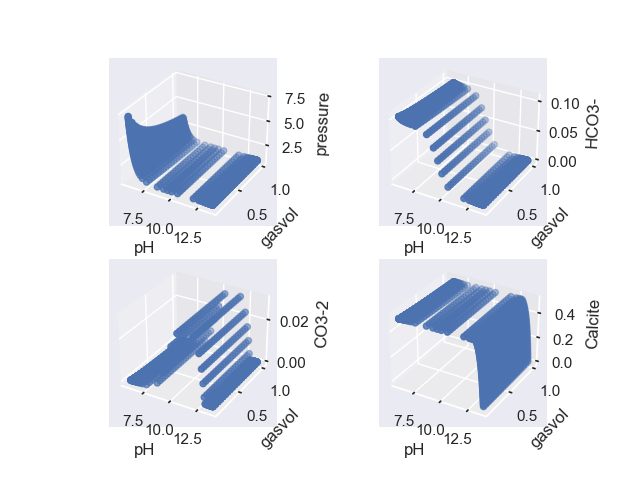

In [5]:
# #plotting...
# Orch_Res.plot(x='gasvolume',y='H2CO3.con',style='r+-',ax=ax[0,0])
# Orch_Res.plot(x='gasvolume',y='HCO3-.con',style='g+-',ax=ax[0,0])
# Orch_Res.plot(x='gasvolume',y='CO3-2.con',style='y+-',ax=ax[0,0])
# Orch_Res.plot(x='gasvolume',y='CO2[g].logact',style='+-',ax=ax[1,0])
# Orch_Res.plot(x='gasvolume',y='Ca+2.con',style='r+-',ax=ax[0,1])
# Orch_Res.plot(x='gasvolume',y='Calcite[s].tot',style='g+-',ax=ax[0,1])
# Orch_Res.plot(x='gasvolume',y='pressure',style='+-',ax=ax[1,1])
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(Orch_Res['pH'],Orch_Res['gasvolume'],Orch_Res['pressure'])
ax.set_xlabel('pH')
ax.set_ylabel('gasvol')
ax.set_zlabel('pressure')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(Orch_Res['pH'],Orch_Res['gasvolume'],Orch_Res['HCO3-.con'])
ax.set_xlabel('pH')
ax.set_ylabel('gasvol')
ax.set_zlabel('HCO3-')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(Orch_Res['pH'],Orch_Res['gasvolume'],Orch_Res['CO3-2.con'])
ax.set_xlabel('pH')
ax.set_ylabel('gasvol')
ax.set_zlabel('CO3-2')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(Orch_Res['pH'],Orch_Res['gasvolume'],Orch_Res['Calcite[s].tot'])
ax.set_xlabel('pH')
ax.set_ylabel('gasvol')
ax.set_zlabel('Calcite')

# %%

In [6]:
Orch_Res['pressure']

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1995    3.194058
1996    3.233459
1997    3.272372
1998    3.310816
1999    3.348806
Name: pressure, Length: 2000, dtype: float64